In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'restaurant-DataSet.csv')

In [3]:
df

,User_ID,Age_Group,Preferred_Cuisine,Last_Visited_Restaurant,Recommendation_Clicked,Reservation_Made,Visit_Rating
0,A001,36-45,Chinese,Ocean Bites,Yes,Yes,3.4
1,A002,36-45,Italian,Elite Eatery,No,No,NaN
2,A003,36-45,Mexican,Spicy Affair,Yes,No,NaN
3,A004,46-55,North Indian,Curry Corner,Yes,No,NaN
4,A005,36-45,North Indian,Pasta Palace,Yes,No,NaN
...,...,...,...,...,...,...,...
995,A996,18-25,Italian,Curry Corner,Yes,Yes,4.1
996,A997,46-55,North Indian,Fishy Feast,No,No,NaN
997,A998,46-55,Continental,Fishy Feast,Yes,Yes,3.2
998,A999,46-55,North Indian,Bella Italia,No,No,NaN


In [4]:
df.size

7000

In [5]:
df.shape

(1000, 7)

In [6]:
df.columns

Index(['User_ID', 'Age_Group', 'Preferred_Cuisine', 'Last_Visited_Restaurant',
       'Recommendation_Clicked', 'Reservation_Made', 'Visit_Rating'],
      dtype='object')

In [7]:
df.isnull().sum()

User_ID                      0
Age_Group                    0
Preferred_Cuisine            0
Last_Visited_Restaurant      0
Recommendation_Clicked       0
Reservation_Made             0
Visit_Rating               663
dtype: int64

In [8]:
df['Visit_Rating']=df['Visit_Rating'].fillna(0)

In [10]:
df.isnull().sum()

User_ID                    0
Age_Group                  0
Preferred_Cuisine          0
Last_Visited_Restaurant    0
Recommendation_Clicked     0
Reservation_Made           0
Visit_Rating               0
dtype: int64

# Question1

### Determine the overall success rate of the recommendation engine in terms of user clicks and reservations made.
Overall Success Rate = (Users who clicked and Made Reservations / Total Users)

In [24]:
Total_Users = df['User_ID'].count()
Users_who_Clicked = df[df['Recommendation_Clicked']=='Yes']['User_ID'].count()
Reservation_made = df[df['Reservation_Made']=='Yes']['User_ID'].count()
print('Total_Users: ',Total_Users)
print('Users_who_Clicked: ',Users_who_Clicked)
print('Reservation_made: ',Reservation_made)
print('Users Clicked Rate: ', (Users_who_Clicked/Total_Users)*100, '%')
print('Overall Success Rate: ', (Reservation_made/Total_Users)*100, '%')

Total_Users:  1000
Users_who_Clicked:  494
Reservation_made:  337
Users Clicked Rate:  49.4 %
Overall Success Rate:  33.7 %


**This means that about 33.67% of the total users who clicked on recommendations went ahead and made reservations based on those recommendations.**

# Question2

### Analyze the effectiveness of recommendations based on the `Age_Group` and `Preferred_Cuisine`. Identify any patterns or segments where recommendations are particularly successful or lacking.

##### Age_group

In [89]:
# Group by 'Age_Group' and aggregate the data
age_group_stats = df.groupby('Age_Group').agg(
    Total_users=('User_ID', 'count'),
    Users_who_Clicked=('Recommendation_Clicked', lambda x: (x == 'Yes').sum()),
    Reservation_made=('Reservation_Made', lambda x: (x == 'Yes').sum()),
    Users_Clicked_Rate=('Recommendation_Clicked', lambda x: ((x == 'Yes').sum() / len(x)) * 100),
    Effectiveness_of_recommendations=('Reservation_Made', lambda x: ((x == 'Yes').sum() / len(x)) * 100),
    Visit_ratings=('Visit_Rating', lambda x: x.sum() )
)

age_group_stats['Visit_ratings'] = age_group_stats['Visit_ratings'] / age_group_stats['Reservation_made']

# Format the percentages to two decimal places
age_group_stats['Users_Clicked_Rate'] = age_group_stats['Users_Clicked_Rate'].round(2)
age_group_stats['Effectiveness_of_recommendations'] = age_group_stats['Effectiveness_of_recommendations'].round(2)
age_group_stats['Visit_ratings'] = age_group_stats['Visit_ratings'].round(1)

# Print the result
age_group_stats.reset_index()

,Age_Group,Total_users,Users_who_Clicked,Reservation_made,Users_Clicked_Rate,Effectiveness_of_recommendations,Visit_ratings
0,18-25,191,90,63,47.12,32.98,4.1
1,26-35,196,101,63,51.53,32.14,4.0
2,36-45,196,93,66,47.45,33.67,3.9
3,46-55,195,103,67,52.82,34.36,4.0
4,55+,222,107,78,48.20,35.14,3.9


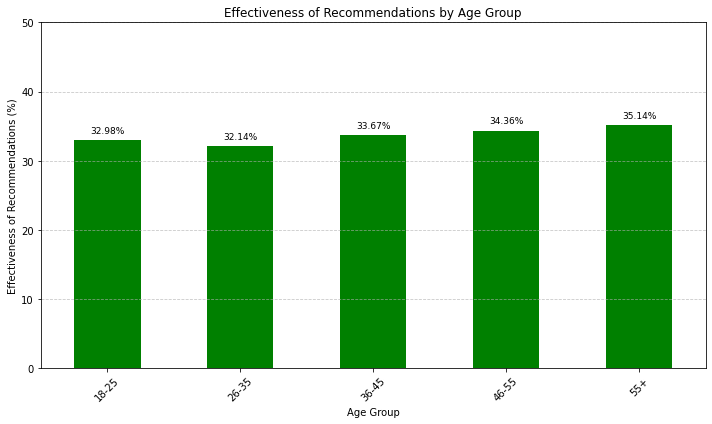

In [133]:
plt.figure(figsize=(10,6))

ax = age_group_stats['Effectiveness_of_recommendations'].plot(kind='bar', color='green')

for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Effectiveness of Recommendations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness of Recommendations (%)')
plt.xticks(rotation=45)
plt.ylim(0, 50)  # Set y-axis limit from 0 to 50
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Based on this analysis, it seems that the effectiveness of recommendations slightly increases with age. 
* Users aged 55+ have the highest effectiveness rate, while users aged 26-35 and 18-25 have slightly lower recommendation effectiveness but still have positive visit ratings.
* However, users across age groups generally have positive visit ratings, indicating overall satisfaction with the service.

##### preferred_cuisine

In [129]:
preferred_cuisine = df.groupby('Preferred_Cuisine').agg(
    Total_Users = ('User_ID','count'),
    Users_who_Clicked=('Recommendation_Clicked', lambda x: (x =='Yes').sum()),
    Reservation_made=('Reservation_Made', lambda x:(x=='Yes').sum()),
    Users_Clicked_Rate = ('Recommendation_Clicked', lambda x:((x=='Yes').sum()/len(x))*100),
    Effectiveness_of_recommendations = ('Reservation_Made', lambda x:((x=='Yes').sum()/len(x))*100),
    Visit_Ratings=('Visit_Rating','sum')
    )

preferred_cuisine['Visit_Ratings']=preferred_cuisine['Visit_Ratings']/preferred_cuisine['Reservation_made']

preferred_cuisine['Users_Clicked_Rate'] = preferred_cuisine['Users_Clicked_Rate'].round(2)
preferred_cuisine['Effectiveness_of_recommendations'] = preferred_cuisine['Effectiveness_of_recommendations'].round(2)
preferred_cuisine['Visit_Ratings'] = preferred_cuisine['Visit_Ratings'].round(1)

preferred_cuisine.reset_index()

,Preferred_Cuisine,Total_Users,Users_who_Clicked,Reservation_made,Users_Clicked_Rate,Effectiveness_of_recommendations,Visit_Ratings
0,Chinese,147,70,48,47.62,32.65,4.1
1,Continental,146,75,55,51.37,37.67,4.0
2,Italian,132,60,40,45.45,30.30,3.8
3,Mexican,146,71,49,48.63,33.56,3.8
4,North Indian,144,65,41,45.14,28.47,4.0
5,Seafood,144,76,50,52.78,34.72,4.0
6,Vegan,141,77,54,54.61,38.30,4.0


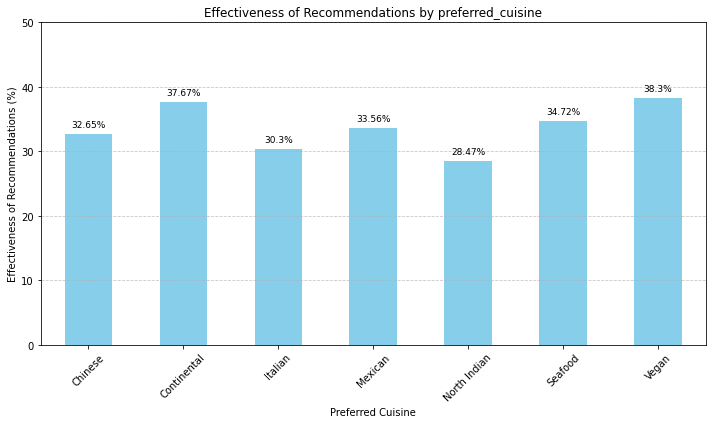

In [132]:
plt.figure(figsize=(10,6))
ax = preferred_cuisine['Effectiveness_of_recommendations'].plot(kind='bar', color='skyblue')

for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Effectiveness of Recommendations by preferred_cuisine')
plt.xlabel('Preferred Cuisine')
plt.ylabel('Effectiveness of Recommendations (%)')
plt.xticks(rotation=45)
plt.ylim(0, 50)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Based on this analysis, the effectiveness of recommendations varies by preferred cuisine. 
* Recommendations for Vegan and Continental cuisines have the highest effectiveness rates, while recommendations for North Indian cuisine have a relatively lower effectiveness rate.
* However, users generally have positive visit ratings across different preferred cuisines.

# Question3

### Based on the `Visit_Rating`, evaluate the satisfaction of users with the recommended restaurants.

To evaluate user satisfaction, we can calculate the average visit rating for users who clicked on recommendations

In [154]:
Recom= df[df['Recommendation_Clicked']=='Yes']['Visit_Rating'].sum()
vr=df[df['Visit_Rating']!=0]['User_ID'].count()
Average_Visit_Rating_for_Users_who_Clicked = Recom/vr

In [158]:
Average_Visit_Rating_for_Users_who_Clicked.round(2)

3.96

The overall satisfaction level among users who clicked on recommendations, with an average rating of around `3.94`.

In [203]:
d = age_group_stats.iloc[:, [0, -1]]
d

,Age_Group,Visit_ratings
0,18-25,4.1
1,26-35,4.0
2,36-45,3.9
3,46-55,4.0
4,55+,3.9


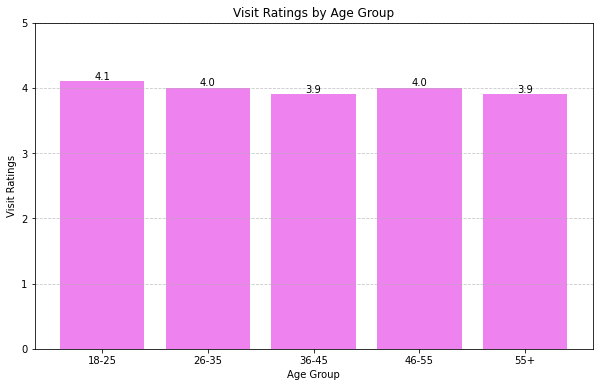

In [211]:
plt.figure(figsize=(10, 6))
bars = plt.bar(d['Age_Group'], d['Visit_ratings'], color='violet')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), va='bottom', ha='center')

plt.title('Visit Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Visit Ratings')
plt.ylim(0, 5.0)  # Set y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [206]:
pc= preferred_cuisine.reset_index().iloc[:,[0,-1]]
pc

,Preferred_Cuisine,Visit_Ratings
0,Chinese,4.1
1,Continental,4.0
2,Italian,3.8
3,Mexican,3.8
4,North Indian,4.0
5,Seafood,4.0
6,Vegan,4.0


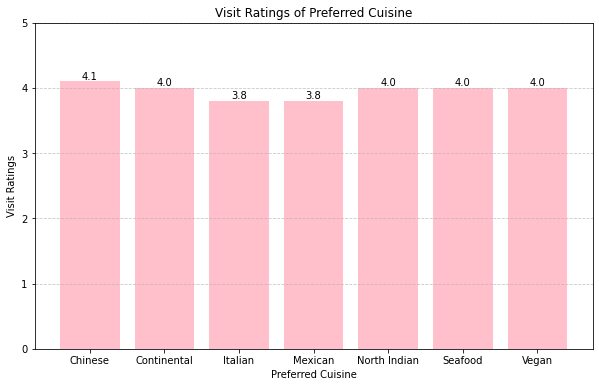

In [212]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pc['Preferred_Cuisine'], pc['Visit_Ratings'], color='pink')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), va='bottom', ha='center')

plt.title('Visit Ratings of Preferred Cuisine')
plt.xlabel('Preferred Cuisine')
plt.ylabel('Visit Ratings')
plt.ylim(0, 5.0)  # Set y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question4

### Analyze the data to deduce if the name or type of the `Last_Visited_Restaurant` has any impact on users trusting the next recommendation. For instance, do users who last visited a seafood restaurant trust a seafood recommendation more?

In [220]:
pivot_table = pd.pivot_table(df, index='Last_Visited_Restaurant', columns='Preferred_Cuisine', 
                             values='Reservation_Made', aggfunc=lambda x: (x == 'Yes').mean() * 100)


pivot_table = pivot_table.round(2).applymap(lambda x: f"{x:.2f}%")


pivot_table.reset_index()

Preferred_Cuisine,Last_Visited_Restaurant,Chinese,Continental,Italian,Mexican,North Indian,Seafood,Vegan
0,Bella Italia,31.25%,50.00%,53.85%,33.33%,20.00%,25.00%,40.00%
1,Curry Corner,27.78%,57.14%,40.91%,30.77%,16.67%,44.44%,9.09%
2,Dragon Bowl,27.27%,20.00%,30.77%,41.67%,25.00%,43.75%,50.00%
3,Elite Eatery,0.00%,33.33%,25.00%,12.50%,28.57%,36.36%,47.06%
4,Fishy Feast,30.77%,27.27%,28.57%,36.36%,22.22%,40.00%,23.08%
5,Green Gardens,35.00%,50.00%,35.29%,36.36%,38.89%,35.71%,50.00%
6,Ocean Bites,35.71%,18.75%,20.00%,54.55%,42.86%,41.67%,40.91%
7,Pasta Palace,42.86%,50.00%,10.00%,33.33%,13.33%,11.76%,45.45%
8,Spicy Affair,33.33%,31.25%,9.09%,41.67%,40.00%,50.00%,30.77%
9,Taco Town,50.00%,36.36%,30.00%,23.08%,33.33%,18.18%,38.46%


* **Users who last visited a Seafood restaurants :**
    - Fishy Feast	Seafood recommendations: Approximately 40.00% of the time
    - Ocean Bites	Seafood recommendations: Approximately 41.00% of the time but higher for Mexican Cuisine<br>
Users who last visited a Seafood restaurant do show a preference for Seafood recommendations, but the preference is not overwhelmingly high (Not True for all Restaurant)<br>
<br>	
* **Users who last visited a Chinese restaurant :**	
    - Dragon Bowl	Chinese recommendations: Approximately 27.27%
    - Other cuisine recommendations: Varied, with the highest being Seafood and Vegan recommendations (43.75% and 50% resp)<br>
Users who last visited a Chinese restaurant do not strongly favor Chinese recommendations, and they show a relatively higher trust in other cuisine recommendations<br>
<br>
* **Users who last visited an Italian restaurants :**	
    - Bella Italia	Italian recommendations: Approximately 53.85%
    - Pasta Palace	Italian recommendations: Approximately 10.00%<br>
Users who last visited an Italian restaurant(Bella Italia) have a strong preference for Italian recommendations but not true for Pasta Palace Restaurant
	
<span style="color:green">**The type of cuisine of the last visited restaurant may have some impact on users trust in the next recommendation. 
These observations indicate that there might be some influence of the last visited restaurant's cuisine type on users trust in recommendations of the same cuisine, but the impact varies depending on the specific cuisine
There are exceptions, users may trust other cuisines as well.** </span>

###  <span style="color:red">Suggestions on how company can improve its recommendation algorithm to better cater to user preferences and improve reservation rates</span>

1. **Personalization**- Utilize user data more effectively to provide personalized recommendations based on preferences. Consider factors like past restaurant choices and visit ratings.
2. **A/B Testing**- Conduct A/B testing to evaluate different recommendation strategies and algorithms to determine which ones are most effective in increasing clicks and reservations.
3. **Feedback Mechanism**- A feedback system where users can rate and review the recommended restaurants. This feedback can be used to refine the recommendations and improve user satisfaction.
4. **Offers/Loyalty Program**-
    - Offer incentives such as discounts or loyalty rewards for users who make reservations through recommendations, encouraging more users to follow through with reservations.
    - Offer different recommendations to users in different age groups or with different preferred cuisines.
5. **Collaborations**- Collaborate with restaurants to provide exclusive offers or deals for users who make reservations through the platform, making the recommendation more appealing.

## <span style="color:red">Optimizing Restaurant Recommendation Engine</span>

* The analysis of Comapnay's recommendation system reveals moderate success in terms of user clicks and reservations with an average user click rate of approximately 49.35% and an average reservation rate of around 33.67%. 
* It highlights that recommendations are most effective for the 55+ age group and for cuisines like Vegan and Continental. 
* Overall, users seem satisfied, with visit ratings averaging around 4.0 across age groups.
* To improve the recommendation system, Company can consider personalization, A/B testing, and user feedback mechanisms. 
* Offering incentives and collaborations with restaurants can also enhance reservation rates.